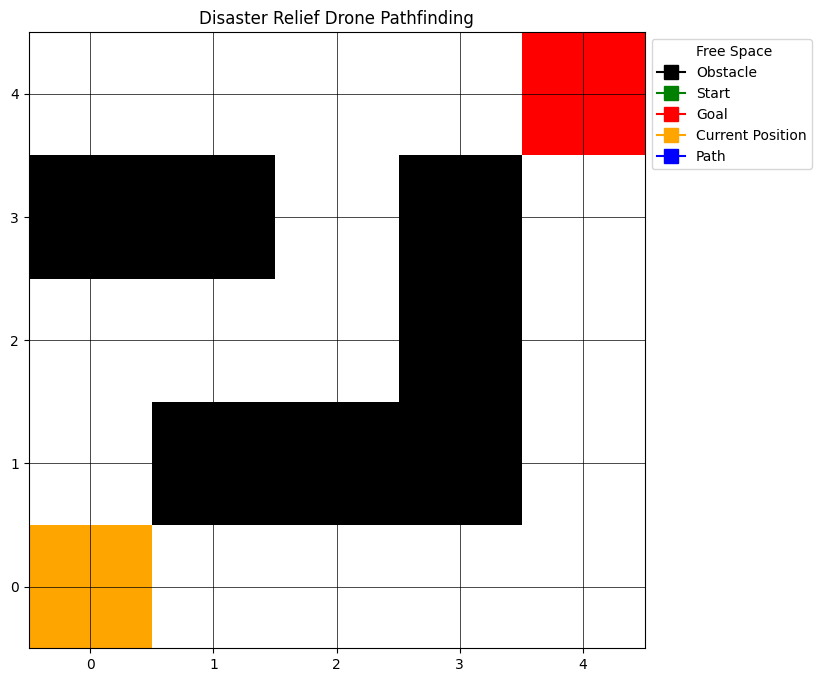

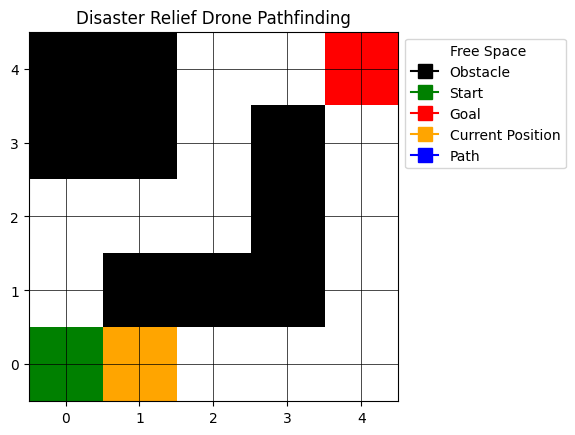

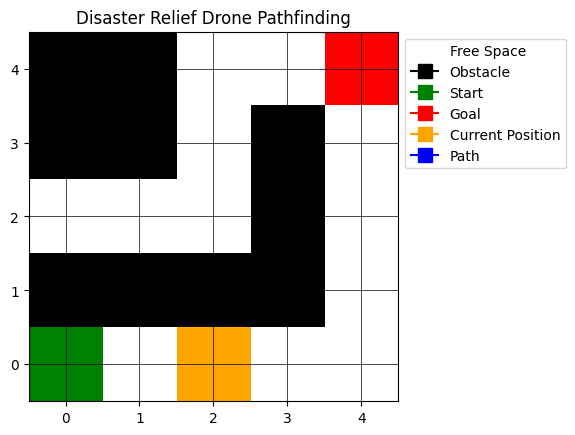

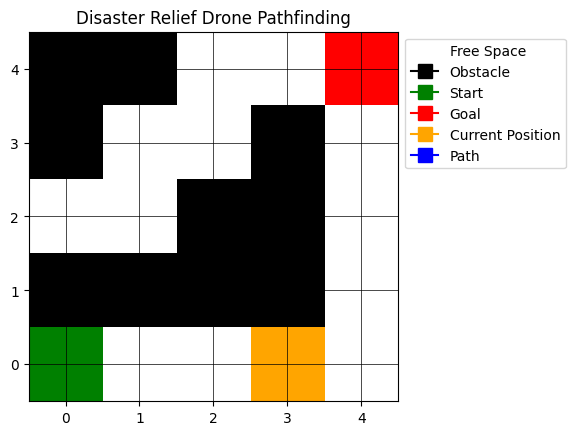

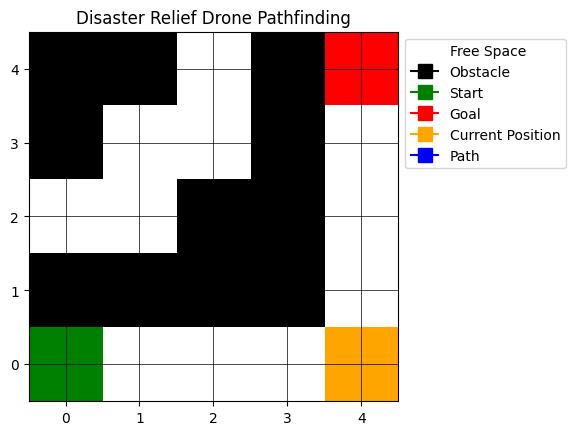

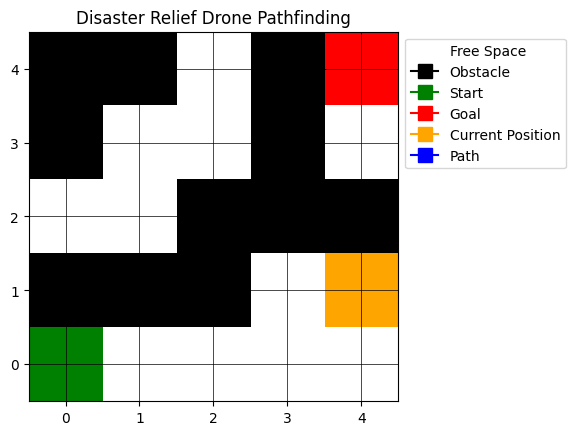

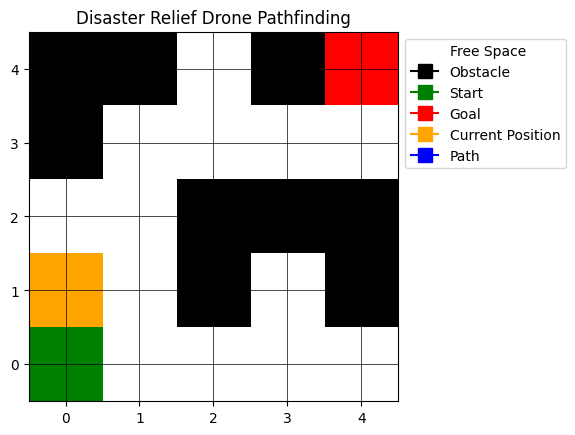

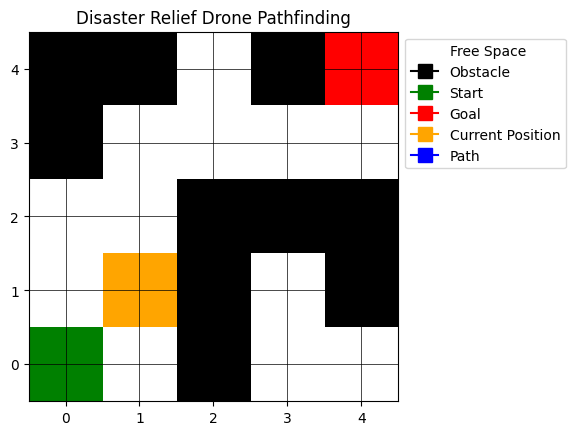

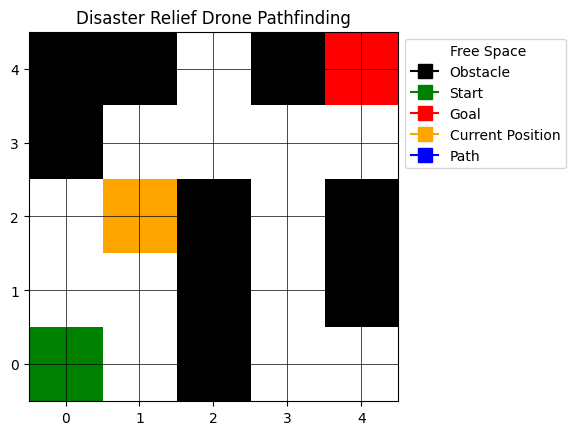

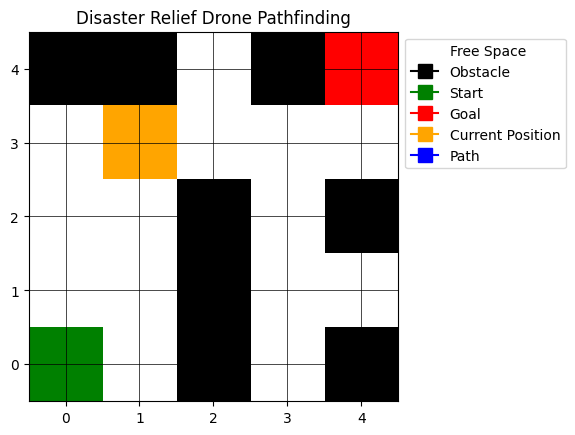

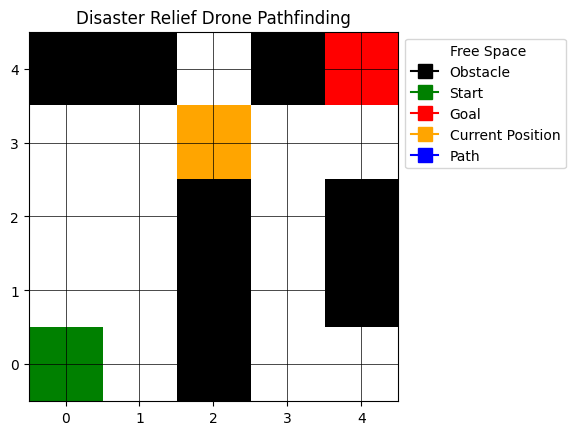

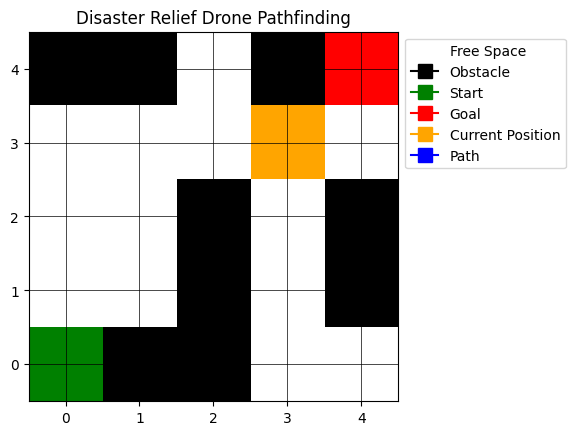

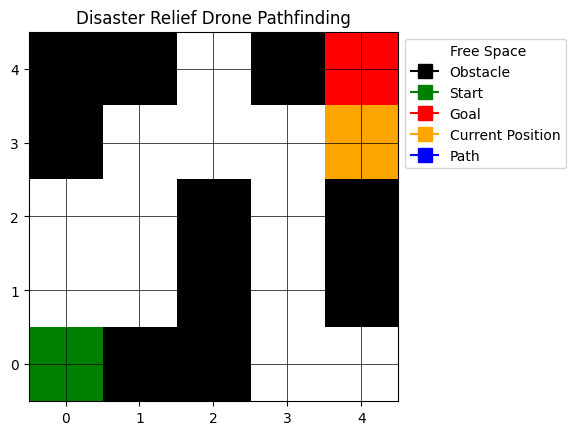

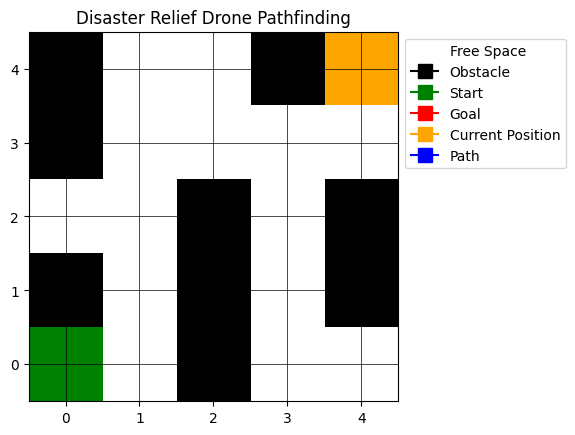

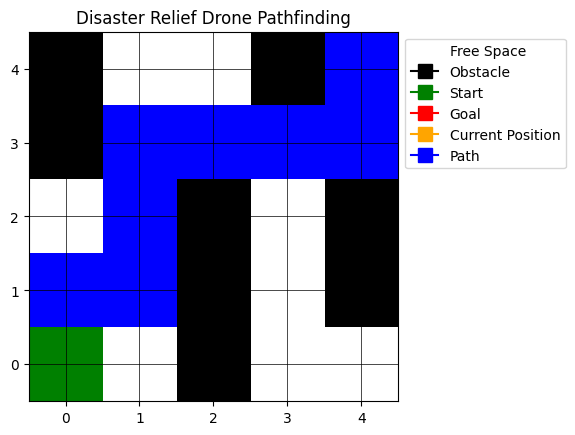

Path found: [(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4)]


In [ ]:
import heapq
import random
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class DisasterReliefDrone:
    def __init__(self, grid, start, goal, weight):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.weight = weight
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        self.visited = set()

    def heuristic(self, node):
        """Heuristic function (Manhattan distance)."""
        return abs(node[0] - self.goal[0]) + abs(node[1] - self.goal[1])

    def is_valid(self, node):
        """Checks if a node is valid and within grid bounds."""
        r, c = node
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    def simulate_dynamic_obstacles(self):
        """Randomly adds or removes obstacles to simulate a dynamic environment."""
        for _ in range(random.randint(1, 3)):  # Modify 1-3 cells randomly
            r = random.randint(0, self.rows - 1)
            c = random.randint(0, self.cols - 1)
            if (r, c) != self.start and (r, c) != self.goal:  # Avoid start and goal
                self.grid[r][c] = 1 if self.grid[r][c] == 0 else 0

    def plot_grid(self, path=None, current=None):
        """Plots the grid with better visuals."""
        grid_visual = [[self.grid[r][c] for c in range(self.cols)] for r in range(self.rows)]

        # Mark the start, goal, and current position
        grid_visual[self.start[0]][self.start[1]] = 2  # Start (green)
        grid_visual[self.goal[0]][self.goal[1]] = 3    # Goal (red)
        if current:
            grid_visual[current[0]][current[1]] = 4  # Current position (orange)

        # Mark the path
        if path:
            for r, c in path:
                grid_visual[r][c] = 5  # Path (blue)

        # Define custom colormap
        cmap = mcolors.ListedColormap(['white', 'black', 'green', 'red', 'orange', 'blue'])
        bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid
        plt.imshow(grid_visual, cmap=cmap, norm=norm)
        plt.xticks(range(self.cols))
        plt.yticks(range(self.rows))
        plt.grid(which='major', color='black', linestyle='-', linewidth=0.5)
        plt.gca().invert_yaxis()  # Invert y-axis to match the grid layout

        # Add labels for legend
        plt.legend(
            handles=[
                plt.Line2D([0], [0], color='white', label='Free Space', marker='s', markersize=10),
                plt.Line2D([0], [0], color='black', label='Obstacle', marker='s', markersize=10),
                plt.Line2D([0], [0], color='green', label='Start', marker='s', markersize=10),
                plt.Line2D([0], [0], color='red', label='Goal', marker='s', markersize=10),
                plt.Line2D([0], [0], color='orange', label='Current Position', marker='s', markersize=10),
                plt.Line2D([0], [0], color='blue', label='Path', marker='s', markersize=10)
            ],
            loc='upper left', bbox_to_anchor=(1, 1)
        )
        plt.title('Disaster Relief Drone Pathfinding')
        plt.pause(0.5)  # Add a slight pause for animation effect

    def find_path(self):
        """
        Executes the Weighted A* algorithm.

        Returns:
        list of tuple: Path from start to goal, or empty list if no path exists.
        """
        open_list = []
        heapq.heappush(open_list, (0, self.start))  # (priority, node)
        came_from = {}
        g_score = {self.start: 0}
        f_score = {self.start: self.weight * self.heuristic(self.start)}

        plt.figure(figsize=(8, 8))  # Increase figure size for better visualization
        while open_list:
            _, current = heapq.heappop(open_list)

            # Visualize the current state of the grid
            self.plot_grid(current=current)

            if current == self.goal:
                # Reconstruct the path
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                self.plot_grid(path=path[::-1])  # Show final path
                plt.show()
                return path[::-1]  # Reverse the path to get start-to-goal direction

            self.visited.add(current)
            for dr, dc in self.directions:
                neighbor = (current[0] + dr, current[1] + dc)

                if not self.is_valid(neighbor) or neighbor in self.visited:
                    continue

                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + self.weight * self.heuristic(neighbor)

                    if neighbor not in [item[1] for item in open_list]:
                        heapq.heappush(open_list, (f_score[neighbor], neighbor))

            # Simulate dynamic obstacles
            self.simulate_dynamic_obstacles()

        plt.show()
        return []  # Return an empty path if no solution

# Example usage
if __name__ == "__main__":
    # Grid (0 = free, 1 = obstacle)
    grid = [
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
    ]
    start = (0, 0)
    goal = (4, 4)
    weight = 1.5  # Heuristic weight-

    # Initialize and run the algorithm
    drone = DisasterReliefDrone(grid, start, goal, weight)
    path = drone.find_path()

    # Print results
    if path:
        print("Path found:", path)
    else:
        print("No path found.")


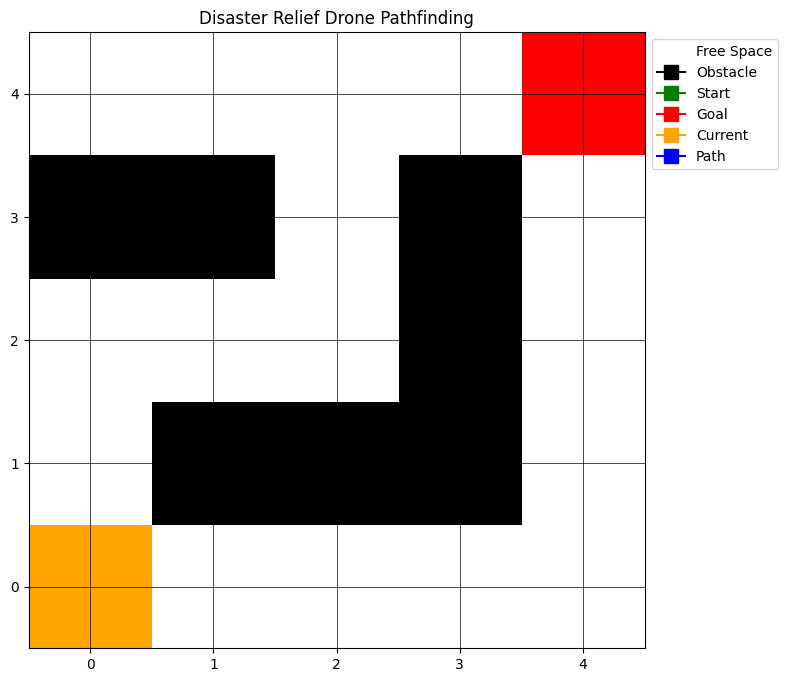

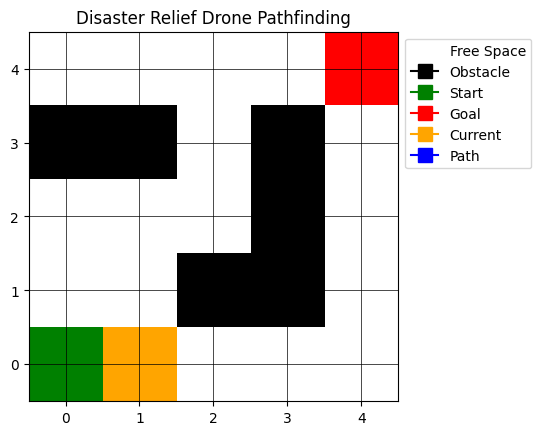

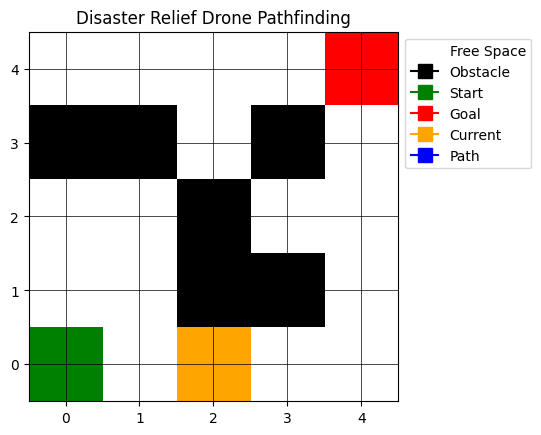

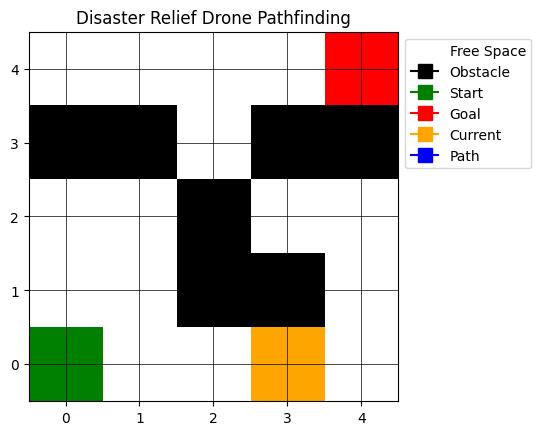

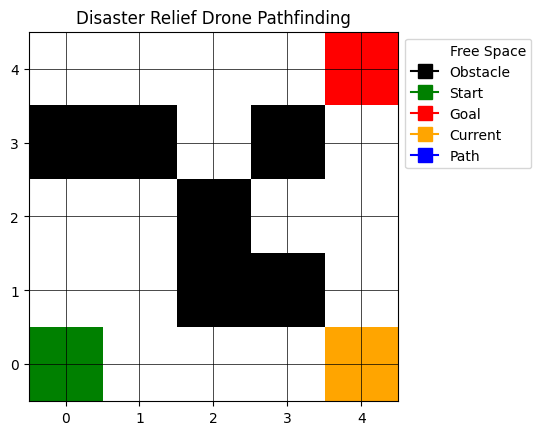

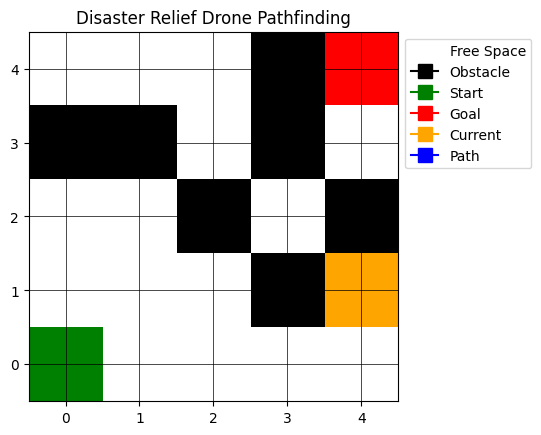

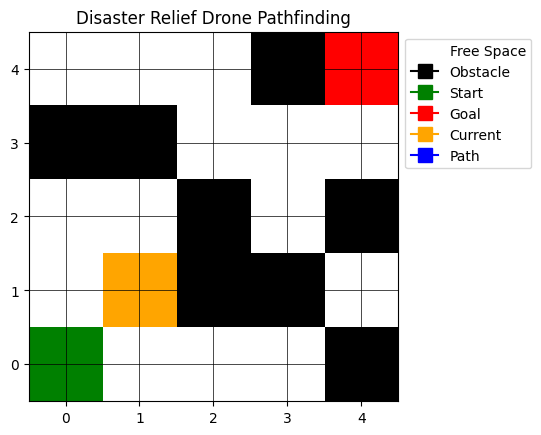

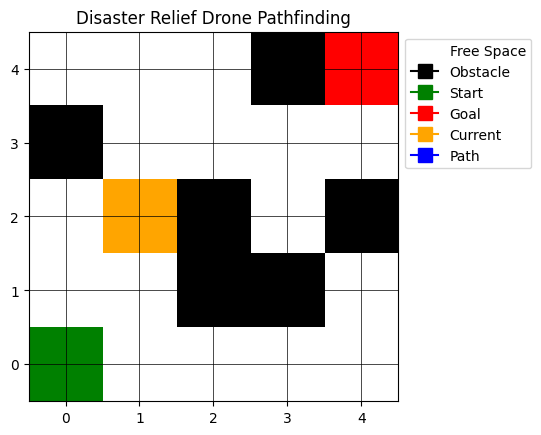

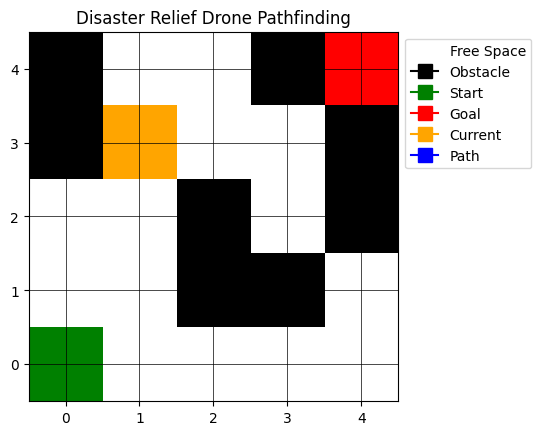

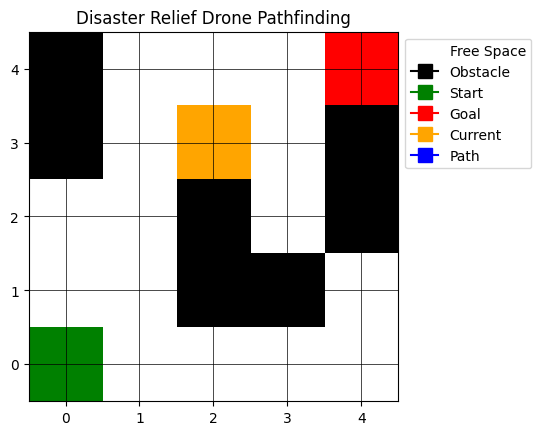

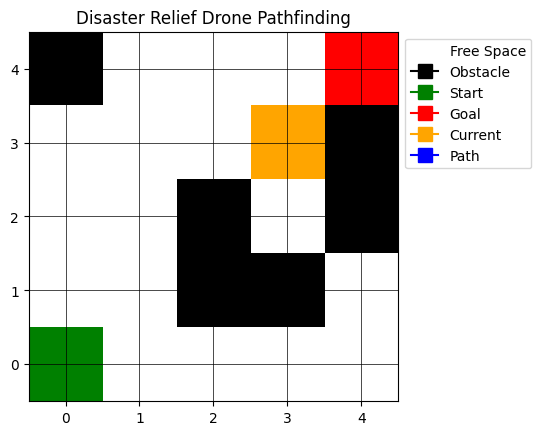

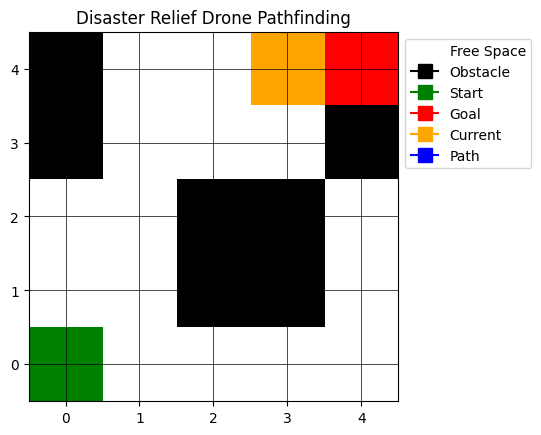

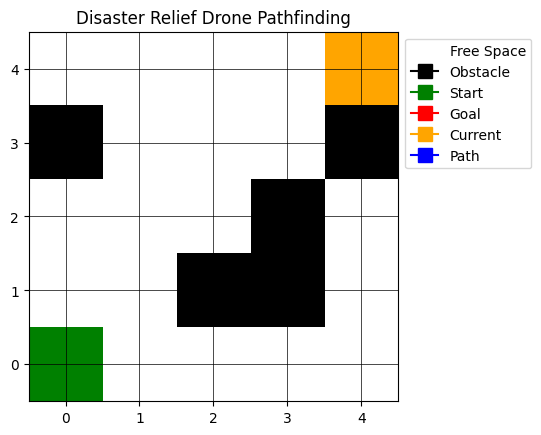

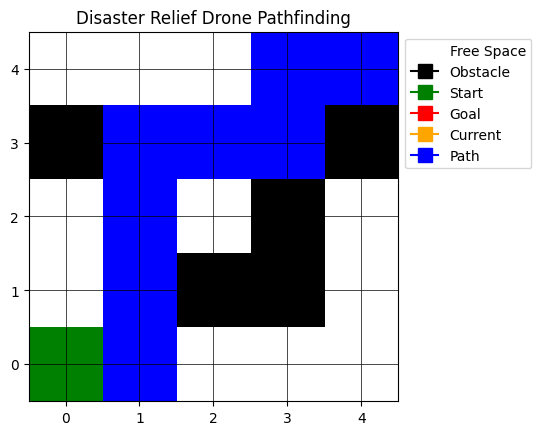

Path found: [(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4)]


In [ ]:
import heapq
import random
import time
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class DisasterReliefDrone:
    def __init__(self, grid, start, goal, weight):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.weight = weight
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        self.visited = set()

    def heuristic(self, node):
        """Heuristic function (Manhattan distance)."""
        return abs(node[0] - self.goal[0]) + abs(node[1] - self.goal[1])

    def is_valid(self, node):
        """Checks if a node is valid and within grid bounds."""
        r, c = node
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    def simulate_dynamic_obstacles(self):
        """Randomly adds or removes obstacles to simulate a dynamic environment."""
        for _ in range(random.randint(1, 3)):  # Modify 1-3 cells randomly
            r = random.randint(0, self.rows - 1)
            c = random.randint(0, self.cols - 1)
            if (r, c) != self.start and (r, c) != self.goal:  # Avoid start and goal
                self.grid[r][c] = 1 if self.grid[r][c] == 0 else 0

    def visualize_grid(self, current=None, path=None):
        """Visualizes the grid and the current state."""
        grid_visual = [[self.grid[r][c] for c in range(self.cols)] for r in range(self.rows)]

        # Mark start, goal, and current position
        grid_visual[self.start[0]][self.start[1]] = 2
        grid_visual[self.goal[0]][self.goal[1]] = 3
        if current:
            grid_visual[current[0]][current[1]] = 4

        # Mark path
        if path:
            for r, c in path:
                grid_visual[r][c] = 5

        # Define colors
        cmap = mcolors.ListedColormap(['white', 'black', 'green', 'red', 'orange', 'blue'])
        bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plot the grid
        plt.imshow(grid_visual, cmap=cmap, norm=norm)
        plt.title("Disaster Relief Drone Pathfinding")
        plt.xticks(range(self.cols))
        plt.yticks(range(self.rows))
        plt.grid(which='major', color='black', linestyle='-', linewidth=0.5)
        plt.gca().invert_yaxis()  # Invert y-axis for intuitive visualization

        # Add legend
        plt.legend(
            handles=[
                plt.Line2D([0], [0], color='white', label='Free Space', marker='s', markersize=10),
                plt.Line2D([0], [0], color='black', label='Obstacle', marker='s', markersize=10),
                plt.Line2D([0], [0], color='green', label='Start', marker='s', markersize=10),
                plt.Line2D([0], [0], color='red', label='Goal', marker='s', markersize=10),
                plt.Line2D([0], [0], color='orange', label='Current', marker='s', markersize=10),
                plt.Line2D([0], [0], color='blue', label='Path', marker='s', markersize=10)
            ],
            loc='upper left', bbox_to_anchor=(1, 1)
        )
        plt.pause(0.5)

    def find_path(self):
        """
        Executes the Weighted A* algorithm.

        Returns:
        list of tuple: Path from start to goal, or empty list if no path exists.
        """
        open_list = []
        heapq.heappush(open_list, (0, self.start))  # (priority, node)
        came_from = {}
        g_score = {self.start: 0}
        f_score = {self.start: self.weight * self.heuristic(self.start)}

        plt.figure(figsize=(8, 8))
        while open_list:
            _, current = heapq.heappop(open_list)

            # Visualize the current state of the grid
            self.visualize_grid(current=current)

            if current == self.goal:
                # Reconstruct the path
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                self.visualize_grid(path=path[::-1])  # Show final path
                plt.show()
                return path[::-1]  # Reverse the path

            self.visited.add(current)
            for dr, dc in self.directions:
                neighbor = (current[0] + dr, current[1] + dc)

                if not self.is_valid(neighbor) or neighbor in self.visited:
                    continue

                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + self.weight * self.heuristic(neighbor)

                    if neighbor not in [item[1] for item in open_list]:
                        heapq.heappush(open_list, (f_score[neighbor], neighbor))

            # Simulate dynamic obstacles
            self.simulate_dynamic_obstacles()

        plt.show()
        return []  # Return an empty path if no solution


# Example usage
if __name__ == "__main__":
    # Grid (0 = free, 1 = obstacle)
    grid = [
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
    ]
    start = (0, 0)
    goal = (4, 4)
    weight = 1.5  # Heuristic weight

    # Initialize and run the algorithm
    drone = DisasterReliefDrone(grid, start, goal, weight)
    path = drone.find_path()

    # Print results
    if path:
        print("Path found:", path)
    else:
        print("No path found.")
